# Lookup Table Interpolation
Here is a simple example of creating a lookup table (LUT) for a function and then interpolating with this LUT to invert a function.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Change plot style
plt.style.use('Solarize_Light2')

# Define function
We are given an image that is a function of $t$ and several other parameters. We need to use this image to determine the values of $t$. Note that $t$ is also a function of space. 

First, we define our functions that we will use as an example.

In [137]:
def f(t, A, B, C):
    # A function of t that we will invert to find t
    GRE1 = A*t
    GRE2 = B*np.exp(C*t)
    S = GRE1*GRE2 / (GRE1**2 + GRE2**2)
    return S

def t_map(u, v):
    # Calculate t as a function of space
    t = np.sqrt(u**2 + v**2)
    return t

# Plot original $t$ values
We now plot our original $t$ values. Our goal will be to determine this mapping, which is our ground truth.

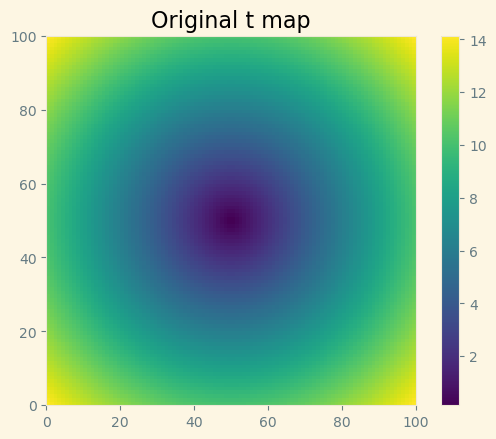

In [138]:
# Calculate original t map
u, v = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
t = t_map(u, v)

# Plot original t map
fig, ax = plt.subplots()
pos = ax.pcolormesh(t)
ax.set_title('Original t map')
ax.set_aspect('equal')
fig.colorbar(pos)

Now, we plot the given image that we will invert to find the t map.

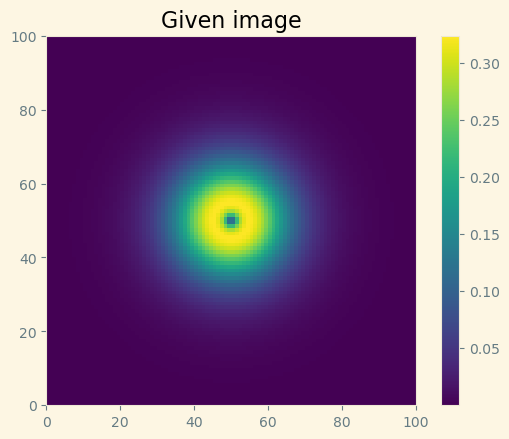

In [139]:
# Calculate given image that we will use to determine t
A = 1
B = 1
C = 1
y = f(t, A, B, C)

# Plot given image
fig, ax = plt.subplots()
pos = ax.pcolormesh(y)
ax.set_title('Given image')
ax.set_aspect('equal')
fig.colorbar(pos)

# Create LUT
Next, we calculate the values for the LUT given the provided parameters and an estimate of the t-values.

In [140]:
# Range of values for t
t_estimate = np.linspace(1, 20, 100).reshape(100,1)

# Calculate what values would be produced with the range for t
values = f(t_estimate, A, B, C).reshape(100,1)
print(f'Range of values for LUT: {np.min(values)}, {np.max(values)}')

# Create LUT
LUT = np.hstack((values, t_estimate))

# Sort LUT so values are in numerical order
LUT = LUT[LUT[:, 0].argsort()]

Range of values for LUT: 4.122307244877108e-08, 0.32402713683194273


# Calculate $t$ map using LUT
Finally, we can calculate values for $t$ by interpolating between the values on our LUT.

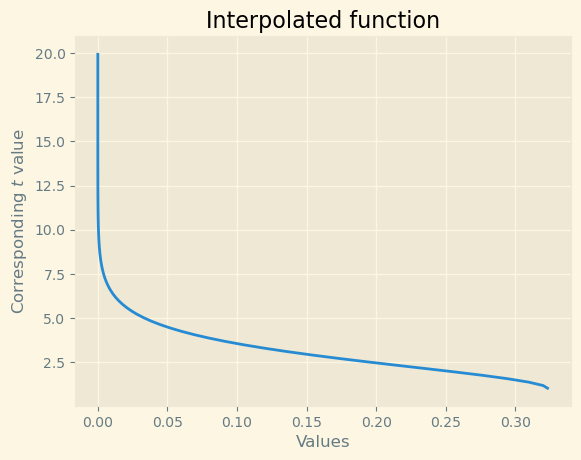

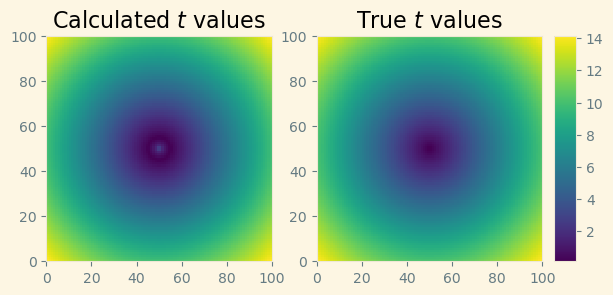

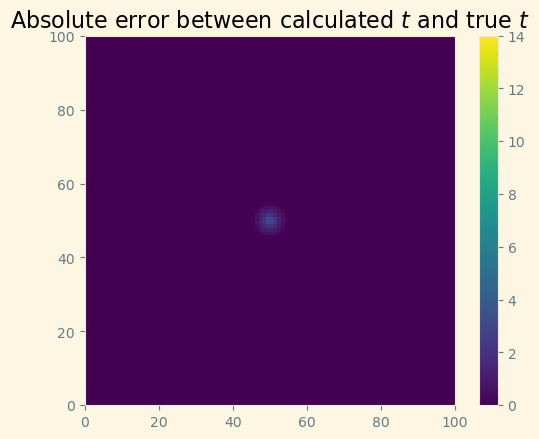

In [141]:
# Create cubic interpolation
cs = CubicSpline(LUT[:, 0], LUT[:, 1])

# Plot function to be inverted
fig, ax = plt.subplots()
ax.plot(LUT[:, 0], LUT[:, 1])
ax.set_xlabel('Values')
ax.set_ylabel('Corresponding $t$ value')
ax.set_title('Interpolated function')

# Calculate for desired values
t_calc = cs(y.flatten())
t_calc = t_calc.reshape(100, 100)

# Plot calculated t values
fig, axs = plt.subplots(1, 2)
pos = axs[0].pcolormesh(t_calc)
axs[0].set_title('Calculated $t$ values')
axs[0].set_aspect('equal')

# Plot true t values
pos = axs[1].pcolormesh(t)
axs[1].set_title('True $t$ values')
axs[1].set_aspect('equal')
cax = axs[1].inset_axes([1.05, 0, 0.1, 1])
fig.colorbar(pos, ax=axs[1], cax=cax)

# Plot difference image
t_diff = abs(t - t_calc)
fig, ax = plt.subplots()
pos = ax.pcolormesh(t_diff, vmin=0, vmax=14)
ax.set_title('Absolute error between calculated $t$ and true $t$')
ax.set_aspect('equal')
fig.colorbar(pos)